In [9]:
from rdkit import Chem
import random
import glob
from tqdm import tqdm

# rdkit warnings
import rdkit.RDLogger as rkl
import rdkit.rdBase as rkrb
rkrb.DisableLog('rdApp.error')

In [2]:
random.seed(2)

In [50]:
# initial smiles
smiles = "COC1CC(C(N)CN)C1"

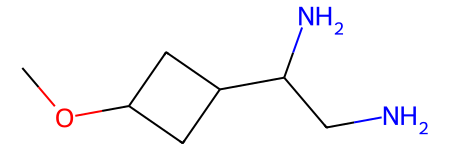

In [51]:
mol = Chem.MolFromSmiles(smiles)
mol

In [52]:
type(mol)

rdkit.Chem.rdchem.Mol

In [53]:
new_atom_order = list(range(mol.GetNumHeavyAtoms()))
new_atom_order

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [54]:
random.shuffle(new_atom_order)

In [55]:
new_atom_order

[5, 9, 3, 4, 6, 7, 2, 8, 1, 0]

In [56]:
mol_new = Chem.RenumberAtoms(mol, newOrder=new_atom_order)

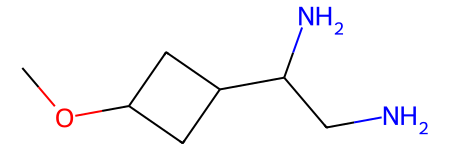

In [57]:
mol_new

In [58]:
smiles_new = Chem.MolToSmiles(mol_new, canonical=False, isomericSmiles=False)

In [59]:
smiles_new

'C(C1CC(OC)C1)(N)CN'

In [60]:
smiles

'COC1CC(C(N)CN)C1'

# Check canonical smiles props

In [2]:
with open("./data-bin/train/00/gdb13.1M.training.txt", "r", encoding="utf-8") as f:
    train_data = f.read().splitlines()

In [3]:
smiles = train_data[3]
smiles

'N#CC(=CC1CO1)c1cocc1N'

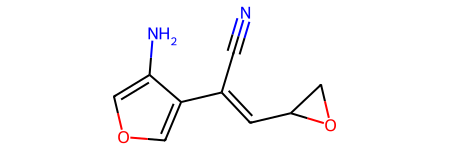

In [4]:
mol = Chem.MolFromSmiles(smiles)
mol

In [5]:
Chem.MolToSmiles(mol, canonical=True, isomericSmiles=False)

'N#CC(=CC1CO1)c1cocc1N'

## Train data

In [16]:
for s in tqdm(train_data):
    mol = Chem.MolFromSmiles(s)
#     val = Chem.MolToSmiles(mol, canonical=True, isomericSmiles=True) == Chem.MolToSmiles(mol, canonical=True, isomericSmiles=False)
    val = Chem.MolToSmiles(mol, canonical=True, isomericSmiles=True) == Chem.CanonSmiles(s)
    if not val:
        print(s)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000000/1000000 [04:00<00:00, 4161.17it/s]


In [10]:
exp = "CC1OC2(C)C1C(=N)N(O)C2C"

In [6]:
# within all generations
gen_files = sorted(glob.glob("./Generations/*.csv"))
gen_data = []

for gen_path in gen_files:
    with open(gen_path, "r", encoding="utf-8") as f:
        gen_data.append(f.read().splitlines())

In [8]:
for i, gen_data_i in enumerate(gen_data):
    for s in tqdm(gen_data_i):
        try:
            mol = Chem.MolFromSmiles(s)
            val = Chem.MolToSmiles(mol, canonical=True, isomericSmiles=True) == Chem.MolToSmiles(mol, canonical=True, isomericSmiles=False)
#             val = Chem.MolToSmiles(mol, canonical=True, isomericSmiles=True) == Chem.CanonSmiles(s)    
            if not val:
                print(i)
                print(s)
        except:
            ...

  1%|█                                                                                                                                                            | 6503/1000000 [00:00<02:18, 7196.19it/s]

3
[18O]CCC1=C(C(C)=NN)NCC=CC1


  2%|██▋                                                                                                                                                         | 17363/1000000 [00:02<02:21, 6937.67it/s]

3
[15N]CNC1=NC(C)C(C(C)=O)NC1=O


  2%|███▏                                                                                                                                                        | 20218/1000000 [00:02<02:17, 7108.32it/s]

3
[3H]CC1=CCCC12C1NC1COC2C


  3%|████▉                                                                                                                                                       | 31711/1000000 [00:04<02:15, 7131.37it/s]

3
[2NH]CC1CC2C(O)CCC2(C)C1N


  4%|█████▋                                                                                                                                                      | 36734/1000000 [00:05<02:14, 7178.48it/s]

3
[18F]CC1=NC(C=O)=NN2CCC2CO1


  5%|███████▍                                                                                                                                                    | 47605/1000000 [00:06<02:12, 7190.08it/s]

3
[9CH]C#CC1=NOC2(C)C(N)CC12CC


  6%|█████████                                                                                                                                                   | 58418/1000000 [00:08<02:12, 7088.64it/s]

3
[10B][Ag]CCCC1=COC(C)=CC1=C(C)C
3
[18F]CC=CN1CC2CCC(C)C2C1=N
3
[19F]COCC12OC3CC1CC3CC2C


  7%|██████████▏                                                                                                                                                 | 65615/1000000 [00:09<02:09, 7205.68it/s]

3
[13C@H]C=CC1=NOC(C#N)C(=O)CON1


  9%|█████████████▋                                                                                                                                              | 88061/1000000 [00:12<02:06, 7186.35it/s]

3
[14CH]C#CCC1OC1C1C=NNC1C#C
3
[64Cu][Au+]CC1(C=C2C(C)CCN2C=N1)CN


  9%|██████████████▏                                                                                                                                             | 90968/1000000 [00:12<02:06, 7196.61it/s]

3
[19F]C=CCC(N)CCC#CC#CCN
3
[153Sm]CC1NCCC12NC(=O)C=C2C=O


 10%|███████████████                                                                                                                                             | 96755/1000000 [00:13<02:06, 7113.04it/s]

3
[32P][P@H]CCCC1NCC(=NNC)C1C(C)O


 10%|███████████████▌                                                                                                                                           | 100327/1000000 [00:14<02:06, 7125.65it/s]

3
[Zn+2][13C@@H]C=C(C)C1=CCC2=NOC(=O)C2=C1


 10%|████████████████                                                                                                                                           | 103914/1000000 [00:14<02:05, 7164.72it/s]

3
[125I]CN(CCO)C(=O)C=CCC(N)=O


 11%|████████████████▋                                                                                                                                          | 107540/1000000 [00:15<02:03, 7212.63it/s]

3
[9CH3]C=COC1=CC(=CCCC)C(C)C1


 11%|█████████████████▏                                                                                                                                         | 111151/1000000 [00:15<02:03, 7171.16it/s]

3
[15NH]CC1OCC(=O)C2OCC3(O)CC123
3
[14C]CNC12COC1C1OC1CCC2O


 12%|███████████████████                                                                                                                                        | 122769/1000000 [00:17<02:00, 7277.98it/s]

3
[9CH3]C=C(C)OC1CC=NN=CCC1C


 13%|████████████████████                                                                                                                                       | 129258/1000000 [00:18<02:02, 7091.24it/s]

3
[60Co]CCC1(O)CCON=COCC=C1


 14%|█████████████████████▋                                                                                                                                     | 140064/1000000 [00:19<02:01, 7104.65it/s]

3
[19F]CC(=O)C12C=CC3OC1C(O3)C2=O


 15%|███████████████████████▉                                                                                                                                   | 154471/1000000 [00:21<01:58, 7146.82it/s]

3
[14CH3]C#CC1=NC(C)=C(C)CC(=N)N1


 18%|████████████████████████████▋                                                                                                                              | 184714/1000000 [00:25<01:53, 7186.89it/s]

3
[153Sm][Ti]C=CC1C2CCC(N)(C1O)C2CO


 19%|█████████████████████████████                                                                                                                              | 187603/1000000 [00:26<01:54, 7083.44it/s]

3
[Nb+4][13C@H]COCC1(CO)COCCCC1(C)O


 20%|███████████████████████████████▌                                                                                                                           | 203324/1000000 [00:28<01:53, 6990.46it/s]

3
[15N]C=CC=CC(C=C)C1(C)CCO1
3
[10B]CCC12CNC(=O)CNC1CCO2


 22%|█████████████████████████████████▋                                                                                                                         | 217007/1000000 [00:30<01:49, 7121.09it/s]

3
[14CH]CC1=NNC2CC3(N)CNCC12C3


 22%|██████████████████████████████████▊                                                                                                                        | 224973/1000000 [00:31<01:48, 7138.94it/s]

3
[229Th]CCN=CN1C(=O)CC=CC1(C)C


 23%|███████████████████████████████████▋                                                                                                                       | 229978/1000000 [00:32<01:48, 7123.75it/s]

3
[Cd+2][10B]


 24%|████████████████████████████████████▋                                                                                                                      | 236447/1000000 [00:33<01:46, 7182.79it/s]

3
[35S]C#CC(=CC(N)C=CC)CC1CC1N


 24%|█████████████████████████████████████▏                                                                                                                     | 240018/1000000 [00:33<01:46, 7121.51it/s]

3
[60Co][Pb+3]C#CC12CC(CC)=CC(=O)C1C2C


 26%|████████████████████████████████████████▋                                                                                                                  | 262481/1000000 [00:36<01:43, 7115.65it/s]

3
[CH2-][Yb][Sc+3][As][SiH][Cr+][C+4][Hf+3][67Ga][Mo+6][Co+][SH2][Nd+][Zr-2]C1=CNC=C2C=COCC=C2N1
3
[67Ga]CC12COCCC1C(=O)NCCO2
3
[I-][35S][Zr-2][P@@]


 27%|██████████████████████████████████████████▎                                                                                                                | 272595/1000000 [00:38<01:41, 7182.73it/s]

3
[9CH]CNC(=O)C1(O)CC2C1C1CC2N1


 29%|█████████████████████████████████████████████                                                                                                              | 290723/1000000 [00:40<01:38, 7209.42it/s]

3
[13C@@H]CC1(C#N)CC2CC(N1)C2CC#N


 30%|██████████████████████████████████████████████▋                                                                                                            | 301530/1000000 [00:42<01:39, 7048.91it/s]

3
[13CH3][IH]CC=CCC#CC1=CC=CC1(C)C


 32%|████████████████████████████████████████████████▊                                                                                                          | 315163/1000000 [00:44<01:36, 7130.41it/s]

3
[123I-]C=CC(O)C1C2CC2CC(C)N1C
3
[15NH2]CC12C=CC(CCNC1=NO)CN2


 33%|██████████████████████████████████████████████████▍                                                                                                        | 325269/1000000 [00:45<01:34, 7169.19it/s]

3
[68Ga]CC1CON(C(=O)CN)C=NN1C


 33%|███████████████████████████████████████████████████▏                                                                                                       | 330307/1000000 [00:46<01:33, 7165.23it/s]

3
[1H]CC1C(=NO)C(C)C2CCC1(O)C2
3
[15N]C=CC=C1C(=O)CNCC1=CNC


 34%|████████████████████████████████████████████████████▎                                                                                                      | 337501/1000000 [00:47<01:32, 7139.49it/s]

3
[18O]CCC1=C(C)C2=NN=C3OCC1C23


 34%|████████████████████████████████████████████████████▊                                                                                                      | 340390/1000000 [00:47<01:31, 7202.09it/s]

3
[13C@H]C#CCC(C)=NNC(=O)CC#CC
3
[13C@@H][Er+3]CCOC=C1C2CCC1(C#N)CO2


 34%|█████████████████████████████████████████████████████▏                                                                                                     | 343259/1000000 [00:48<01:32, 7130.94it/s]

3
[Na][C+][68Ga][Au+3][BH]
3
[2H]C#CC#CCCNC(C)CCC=O


 35%|██████████████████████████████████████████████████████▋                                                                                                    | 352593/1000000 [00:49<01:31, 7090.34it/s]

3
[14CH3]C#CC(NC=C)C(=O)ON=CC#N


 37%|█████████████████████████████████████████████████████████▊                                                                                                 | 372867/1000000 [00:52<01:27, 7195.25it/s]

3
[2H]CC1CC2OCC2C(=N)N(N)C1=N


 38%|██████████████████████████████████████████████████████████▌                                                                                                | 377911/1000000 [00:52<01:27, 7130.29it/s]

3
[2H]C#CC1=CC=C(C)C1=CC(C)O


 40%|█████████████████████████████████████████████████████████████▍                                                                                             | 396687/1000000 [00:55<01:26, 6961.08it/s]

3
[11CH3]C#CC12CC(CN(O)C(=N)O1)C2=O


 40%|█████████████████████████████████████████████████████████████▊                                                                                             | 398835/1000000 [00:55<01:26, 6964.34it/s]

3
[67Ga]C=CCC1C(=O)C(N)=NC2CC21O


 40%|██████████████████████████████████████████████████████████████▎                                                                                            | 401727/1000000 [00:56<01:23, 7144.77it/s]

3
[14C]C#CC1=NN=COCC1=C(C)C=C
3
[32P]CC1=NNC2C(O)CC1C2(O)CO


 40%|██████████████████████████████████████████████████████████████▌                                                                                            | 403876/1000000 [00:56<01:23, 7130.98it/s]

3
[31P]CC=C(C=O)NC(=S)N1CCC1


 41%|███████████████████████████████████████████████████████████████▍                                                                                           | 408906/1000000 [00:57<01:22, 7189.25it/s]

3
[15NH2]CC12COCOC3C(C=NNC1)C32


 41%|███████████████████████████████████████████████████████████████▌                                                                                           | 410354/1000000 [00:57<01:21, 7199.42it/s]

3
[2NH]CC1=COC(C)C2=NOC=NC12C


 44%|███████████████████████████████████████████████████████████████████▊                                                                                       | 437821/1000000 [01:01<01:18, 7117.34it/s]

3
[31P]C=C1OC=C(C)N=C1NC(=C)CO


 44%|████████████████████████████████████████████████████████████████████▊                                                                                      | 444271/1000000 [01:02<01:18, 7076.15it/s]

3
[19F]C1CCC2NC2CC12C=COCO2


 45%|█████████████████████████████████████████████████████████████████████▊                                                                                     | 450038/1000000 [01:03<01:16, 7164.81it/s]

3
[11C]C1C=CC2(C=NOCC#CC=C2)N1


 45%|█████████████████████████████████████████████████████████████████████▉                                                                                     | 451459/1000000 [01:03<01:18, 6961.18it/s]

3
[15NH2]C#CC(=NCCC)N(C=N)OC
3
[123I-]CCNC1(C=O)C2CNCC21CC


 46%|██████████████████████████████████████████████████████████████████████▊                                                                                    | 457189/1000000 [01:04<01:15, 7142.44it/s]

3
[2NH]C=CC(=NCC)NN=C(C)OC=O
3
[3H]CCC1(C2CN=CN2)CNCCO1


 49%|███████████████████████████████████████████████████████████████████████████▌                                                                               | 487472/1000000 [01:08<01:11, 7166.46it/s]

3
[125I]CCC1(C)C=NOC12C(=O)CC2C


 49%|████████████████████████████████████████████████████████████████████████████                                                                               | 490365/1000000 [01:08<01:11, 7168.84it/s]

3
[35S]CC(C)C(CN)=C1C=CC(C=O)O1


 49%|████████████████████████████████████████████████████████████████████████████▋                                                                              | 494636/1000000 [01:09<01:11, 7042.77it/s]

3
[35S]C=C1C=NN2CC2C2NCC12NC


 50%|████████████████████████████████████████████████████████████████████████████▉                                                                              | 496765/1000000 [01:09<01:11, 7033.83it/s]

3
[15NH]c1c(N)c2c(n1C1CCNC1)O2


 50%|█████████████████████████████████████████████████████████████████████████████▉                                                                             | 502541/1000000 [01:10<01:09, 7137.66it/s]

3
[13CH2][BH-]CC12C=CC(COCC=C1)C2CO


 51%|██████████████████████████████████████████████████████████████████████████████▊                                                                            | 508293/1000000 [01:11<01:09, 7108.16it/s]

3
[15N]C=C1C2CCCC1(C(=O)O)CC2O


 51%|███████████████████████████████████████████████████████████████████████████████▏                                                                           | 511166/1000000 [01:11<01:09, 7033.06it/s]

3
[10B]C#CC1NN=COC2COC1(C)C2


 52%|████████████████████████████████████████████████████████████████████████████████▎                                                                          | 518326/1000000 [01:12<01:07, 7127.30it/s]

3
[13C]CCC(C)C1=COCC1C(=N)NN


 52%|█████████████████████████████████████████████████████████████████████████████████                                                                          | 523374/1000000 [01:13<01:07, 7092.96it/s]

3
[124I][S-][Ta+5][67Ga][Si+4][S@][Ca][Rh+2]
3
[18O]C#CC(O)(C#C)C1=CC2CN2CC1


 53%|█████████████████████████████████████████████████████████████████████████████████▋                                                                         | 527002/1000000 [01:13<01:05, 7243.86it/s]

3
[31P]CC12CC1C1CC1(CO2)C(C)(C)O


 53%|██████████████████████████████████████████████████████████████████████████████████                                                                         | 529165/1000000 [01:14<01:06, 7034.47it/s]

3
[13CH]CC=C1CCC2C(O)(CC)C2(C)O1
3
[68Ga][SeH-]CC12NC(C#N)=CC1COC2C=O


 53%|██████████████████████████████████████████████████████████████████████████████████▋                                                                        | 533469/1000000 [01:14<01:06, 7042.93it/s]

3
[13C@@H]C=NN1CC2(COC2)N=C1C(=C)C


 53%|██████████████████████████████████████████████████████████████████████████████████▉                                                                        | 534892/1000000 [01:14<01:05, 7055.94it/s]

3
[35S]CCC1=CCN2CCCC2(CN)O1
3
[9CH]CN=C1NC2C3CC1NC2C(O)C3


 54%|████████████████████████████████████████████████████████████████████████████████████▏                                                                      | 543534/1000000 [01:16<01:04, 7041.45it/s]

3
[153Sm]C#CC1C=CC2(CC2)C1(C#C)NC
3
[124I][Rh+3]C=C1C2NC3C(CC1N3C=NC)C2
3
[31P][13C]C=CCC1=C(N)N(C(=N)N)C1=CC


 55%|████████████████████████████████████████████████████████████████████████████████████▌                                                                      | 545691/1000000 [01:16<01:03, 7128.87it/s]

3
[13CH]CCC(=O)NC(=N)C(O)C=C(C)C
3
[11CH3]CC1(C)CCNCC2C=CC1C2


 56%|██████████████████████████████████████████████████████████████████████████████████████                                                                     | 555083/1000000 [01:17<01:01, 7210.65it/s]

3
[13CH3]CC1=CN(O)C2=NNCC=C2C1N


 56%|██████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 560156/1000000 [01:18<01:01, 7177.21it/s]

3
[14CH3]C#CC12CC(C=C(OC=C)C1)C2


 57%|███████████████████████████████████████████████████████████████████████████████████████▊                                                                   | 566668/1000000 [01:19<01:00, 7153.65it/s]

3
[18F]CC(O)C12CCOC1C(=N)N(C)C2


 59%|██████████████████████████████████████████████████████████████████████████████████████████▊                                                                | 585494/1000000 [01:22<00:57, 7164.61it/s]

3
[NH-][14CH]CC12C=C(CO)C(CO1)C2C1CC1O


 61%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                                             | 605776/1000000 [01:24<00:55, 7111.35it/s]

3
[15NH][S+2][F]


 61%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                                            | 607935/1000000 [01:25<00:55, 7033.83it/s]

3
[13CH]CC(=CCCCC1CN1)C(=O)NO


 61%|███████████████████████████████████████████████████████████████████████████████████████████████                                                            | 612963/1000000 [01:25<00:54, 7139.48it/s]

3
[PH4][64Cu][Ba+][Tl]C1CC2CC5CC4CCCC1C2C54O


 62%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 623095/1000000 [01:27<00:52, 7144.65it/s]

3
[13CH2]C=CS(=O)(=O)C(C=O)OC1CC1O


 63%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                                         | 631686/1000000 [01:28<00:51, 7156.74it/s]

3
[13C]C=C(C#N)C(C#N)C1=CC2NC2C1


 63%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                                        | 633844/1000000 [01:28<00:51, 7116.55it/s]

3
[1H]CC1N2C=NC3C(C4NC43C)C12C


 65%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                      | 646748/1000000 [01:30<00:50, 7020.19it/s]

3
[18O]CC1CNC2(C=CCO)CC1OC2


 67%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 665367/1000000 [01:33<00:46, 7144.05it/s]

3
[124I-]C=CC1(CC)C2CC(O2)C(C)C1O
3
[2NH]C#CC(C(=NC=N)NN1CC1)C(N)=O


 68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                 | 682718/1000000 [01:35<00:44, 7082.35it/s]

3
[15NH2]C=C1C(C(C)N)CC2(NC)CCC12


 69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                | 685604/1000000 [01:36<00:43, 7179.68it/s]

3
[14CH]C=C1CC(O)CC23C=CCC2CC13


 69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                | 688507/1000000 [01:36<00:43, 7225.58it/s]

3
[15NH2]C=CC1=CCC2(O)C=CC(C2)OC1


 69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                               | 691400/1000000 [01:36<00:42, 7202.75it/s]

3
[123I]CC(=O)NNC1=NCCCOC1=O


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                            | 712382/1000000 [01:39<00:40, 7173.64it/s]

3
[15NH2]CC1(C)OC2OC(C3CNC3)C21O


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 714556/1000000 [01:40<00:39, 7217.70it/s]

3
[68Ga]C#CC1=NCC2(C(N)C=C)CC2N1


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                           | 717431/1000000 [01:40<00:39, 7162.23it/s]

3
[14CH3]CC1OCC2C1C(C)C(=N)N2C


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 738380/1000000 [01:43<00:36, 7108.82it/s]

3
[18F]CNC(=O)C(CN)C1CCCNC1


 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                       | 744184/1000000 [01:44<00:36, 7082.79it/s]

3
[123I][C-]CC1(C)ON=CC2=C(CC(=O)C2)O1


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                       | 747067/1000000 [01:44<00:35, 7177.16it/s]

3
[7NaH]


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                      | 755063/1000000 [01:45<00:34, 7108.38it/s]

3
[Ni][PdH2][Xe][13CH][Pd+4][Co+][211At][11C][Tc][AsH+][Ga][CuH2]


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                     | 759348/1000000 [01:46<00:34, 7016.93it/s]

3
[9CH3]C#CC12CC=CC1C2C1CC(C)C1


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 762916/1000000 [01:46<00:33, 7046.75it/s]

3
[123I-]C=C(N(N)C=N)C(C)(C)CC(N)=O


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 764342/1000000 [01:47<00:33, 7046.84it/s]

3
[13CH2][60Co][125I][Cl+2][C@@H]
3
[125I]C=CC1(C2(C)CC2)CC(=NO)CO1


 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 782334/1000000 [01:49<00:30, 7149.17it/s]

3
[1H]CCCC12C(C)C3CN1C2CCN3


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 798228/1000000 [01:51<00:28, 7071.21it/s]

3
[123I][SH-]CC1(N)C=C(C2CNC2)NS1(=O)=O


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 799653/1000000 [01:52<00:28, 7033.72it/s]

3
[1H]C=C(C)C1=C(C(N)C(=O)O)C=CC1


 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 809745/1000000 [01:53<00:26, 7118.71it/s]

3
[229Th]CC=C(C=CCN)CC#CC(C)C


 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 816902/1000000 [01:54<00:25, 7067.32it/s]

3
[125I]CC1C2CC1(CO)OC(=O)C2=NO
3
[68Ga]CC1=CCC2C(C)CN2C1=NC=N


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                          | 827020/1000000 [01:55<00:24, 7201.85it/s]

3
[131I]C=CC1=CN(N)C2=NCC=CC2C1


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 834242/1000000 [01:56<00:23, 7109.64it/s]

3
[18O]CC1=NCC2=C(OCC2N)N1C=N


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 837105/1000000 [01:57<00:23, 7027.07it/s]

3
[18OH]CC(C)=CC12CCNC(C)(C1)C2N


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 847986/1000000 [01:58<00:21, 7174.94it/s]

3
[64Cu]C=CC12CC=CC1CNS(=O)(=O)N2


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 852296/1000000 [01:59<00:20, 7091.04it/s]

3
[14C]C#CCN1CC2C(NC)C1C2(C)C


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 860837/1000000 [02:00<00:19, 7099.13it/s]

3
[131I][Ir+2]C1=CN2NCCON=C2CC1


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 862994/1000000 [02:00<00:19, 7152.98it/s]

3
[2H]CC(=C(CN)CO)C1(O)COC1


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 876711/1000000 [02:02<00:17, 7142.04it/s]

3
[153Sm]CC12NC1C1OC(C3CC1N3)C2O


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 893500/1000000 [02:05<00:14, 7252.73it/s]

3
[3H]C=CC1C2(O)CC(C2)C1(C)C(C)N


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 898540/1000000 [02:05<00:14, 7171.19it/s]

3
[CaH2][11C]


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 913007/1000000 [02:07<00:12, 7077.64it/s]

3
[13CH2]COCC12CCC3(CO3)C(N1)C2N


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 921695/1000000 [02:09<00:10, 7261.31it/s]

3
[11CH3]CC=C1COC(=O)N(C)C(=NC)N1
3
[125I]CC1CN(C)C(=NOCC2CO2)N1


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 931070/1000000 [02:10<00:09, 7124.96it/s]

3
[Cr+][Hg+][15N][U+2]\\[Ca+2][13C][Rh-][35S][Co+3][Br+2][GeH]


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 934678/1000000 [02:10<00:09, 7080.88it/s]

3
[32P]C=CC12CCC1C(O)(C#N)CC2O


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 937544/1000000 [02:11<00:08, 7143.80it/s]

3
[Cu][31P]C=C1CC(=C)C2=CC(C#N)CC12


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 941869/1000000 [02:11<00:08, 7158.32it/s]

3
[211At]CC1(C)CCOCc2ccoc2O1


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 945472/1000000 [02:12<00:07, 7128.70it/s]

3
[15CH]C=CCC1=CC2OC2CC1NC=O
3
[13C]C=CC(C)C=CC1=CNN=C(C)C1
3
[Ti+6][11C]C=CC1(CC)COC2C=NOC1C2
3
[2NH]CCC12CC3NN=CC3C1C2C#N


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 966332/1000000 [02:15<00:04, 7160.07it/s]

3
[15CH]CCC1C2C=CC(C3CNC13C)C2


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 983653/1000000 [02:17<00:02, 7236.50it/s]

3
[13C@@H]C=C(C)C(=O)C(C)(C#N)OC(C)=O
3
[15NH2]CC=C1CNC2=C1COC=CC2=O


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 989468/1000000 [02:18<00:01, 7270.92it/s]

3
[13C@@H]c1occ(CC=CNC=O)c1CO
3
[31P]C=C(CC1C=NNCC1C)C(C)O


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000000/1000000 [02:20<00:00, 7139.41it/s]


3
[CH-][13N]C(C=O)(C#N)N=CNC(=O)C=O


 36%|███████████████████████████████████████████████████████▏                                                                                                   | 355946/1000000 [00:50<01:32, 6978.57it/s]

4
N1Cc2scnc2OC=C1CC[123I-]N


 52%|████████████████████████████████████████████████████████████████████████████████▊                                                                          | 521055/1000000 [01:14<01:07, 7098.41it/s]

4
[14C]C=Nn1ccc2c1N1CC1CN2


 55%|█████████████████████████████████████████████████████████████████████████████████████▏                                                                     | 549347/1000000 [01:18<01:06, 6805.02it/s]

4
[15CH]CCC1C(C2CCC2)C1C(=O)O


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████                                                   | 671118/1000000 [01:36<00:47, 6935.74it/s]

4
[10B]C=C1COC=C(C2CO2)C2CC2N1


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 913550/1000000 [02:10<00:12, 6910.07it/s]

4
[9CH3]C=C1CC2COC3C1CC1C2C31


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 960672/1000000 [02:17<00:05, 6947.43it/s]

4
[118Sn]C=C1CC23C=CC=C(CNC2)OC13


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 966263/1000000 [02:18<00:04, 6908.04it/s]

4
CC(C=O)=CN(C)CC(C#N)C[VH][Ac-][Sr][14C][BaH2][Zn]C=Nc1ccnnc1


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 990103/1000000 [02:22<00:01, 7138.98it/s]

4
[11C]CNC=C1C=NOC2(C1)CNC2


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000000/1000000 [02:23<00:00, 6966.42it/s]


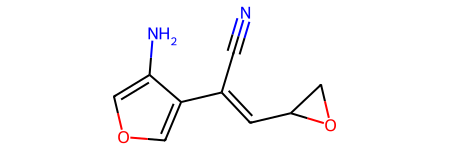

In [29]:
mol

In [31]:
smiles = train_data[3]
smiles

'N#CC(=CC1CO1)c1cocc1N'

In [32]:
Chem.CanonSmiles(smiles)

'N#CC(=CC1CO1)c1cocc1N'

In [22]:
with open("./checkpoint2800_top_p_0.9_n_10_temp_2.csv", "r", encoding="utf-8") as f:
    data = f.read().splitlines()

In [23]:
len(data)

538802